In [ ]:
# Spam Detection
# ---------------------------------------------
# includes CountVectorizer for a dataframe with spams and no spams
# includes a Naive Bayes classifier with Multinobial Distribution: MultinomialNB
# includes the computation of several performance metrics such as AUC_Score, Accuracy, Precision, Recall, F1-Score & Confusion Matrix

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB, ComplementNB # SECOND FOR SKEWED DATASETS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sn

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
## LOAD CSV FILE DATA & STORE THEM IN X, Y ARRAYS

# Load the CSV file into a DataFrame
df = pd.read_csv("/content/drive/MyDrive/nlp_projects/data/spam.csv", encoding="ISO-8859-1")
# drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

# Tokenize text
X=[]
for index,sentence in enumerate('v2'):
    token = sentence.split()
    X.append(token)

<Axes: >

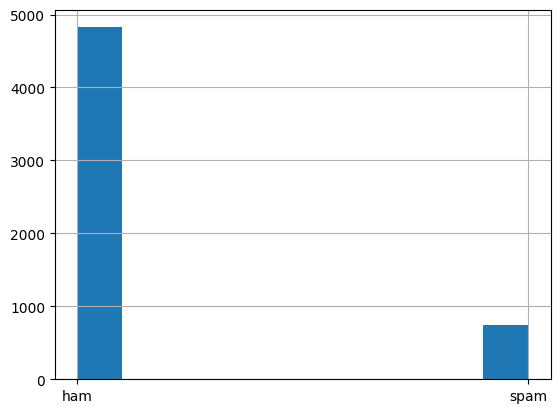

In [10]:
# Histogram to see how imbalanced the dataset is
df['v1'].hist()

In [11]:
# Create binary labels
df['labels'] = df['v1'].map({'ham': 0, 'spam': 1})
Y = df['labels'].to_numpy()

In [12]:
## SPLIT DATA TO TRAIN AND TEST

# Split the data into a training set and a test set
test_size = 0.2
random_state = 10
# split up the data
X_train, X_test, Y_train, Y_test = train_test_split(df['v2'], Y, test_size=test_size, random_state=random_state)

In [13]:
## VECTORIZE (Text -> Numeric Sequences)

# Initialize the CountVectorizer with stop words removed
vectorizer = CountVectorizer(stop_words='english',decode_error='ignore')
Xtrain = vectorizer.fit_transform(X_train)
Xtest = vectorizer.transform(X_test)

In [14]:
## CHOOSE CLASSIFIER/METHOD AND FIT MODEL

model = MultinomialNB()
model.fit(Xtrain,Y_train)

MultinomialNB()

In [15]:
## COMPUTE SEVERAL PERFORMANCE METRICS

# Accuracy
print("train acc:", model.score(Xtrain, Y_train))
print("test acc:", model.score(Xtest, Y_test))
# F1-Score
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
print("train F1:", f1_score(Y_train, Ptrain))
print("test F1:", f1_score(Y_test, Ptest))
# Precision, Recall, F1-Score
pr_rec_f1_train = precision_recall_fscore_support(Y_train,Ptrain,average='binary')
pr_rec_f1_test = precision_recall_fscore_support(Y_test,Ptest,average='binary')
print("train Precision:", pr_rec_f1_train[0],", train Recall:",pr_rec_f1_train[1],", train F1:",pr_rec_f1_train[2])
print("test Precision:", pr_rec_f1_test[0],", test Recall:",pr_rec_f1_test[1],", test F1:",pr_rec_f1_test[2])
# AUC
Prob_train = model.predict_proba(Xtrain)[:,1]
Prob_test = model.predict_proba(Xtest)[:,1]
print("train AUC:", roc_auc_score(Y_train, Prob_train))
print("test AUC:", roc_auc_score(Y_test, Prob_test))

# Confusion Matrices
cm_train = confusion_matrix(Y_train, Ptrain)
cm_test = confusion_matrix(Y_test, Ptest)
# Plotting Function
# Scikit-Learn is transitioning to V1 but it's not available on Colab
# The changes modify how confusion matrices are plotted
def plot_cm(cm):
  classes = ['ham', 'spam']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

train acc: 0.9948395781916087
test acc: 0.9883408071748879
train F1: 0.9807852965747702
test F1: 0.9559322033898305
train Precision: 0.9783333333333334 , train Recall: 0.983249581239531 , train F1: 0.9807852965747702
test Precision: 0.9724137931034482 , test Recall: 0.94 , test F1: 0.9559322033898305
train AUC: 0.9974548910354883
test AUC: 0.989392055267703


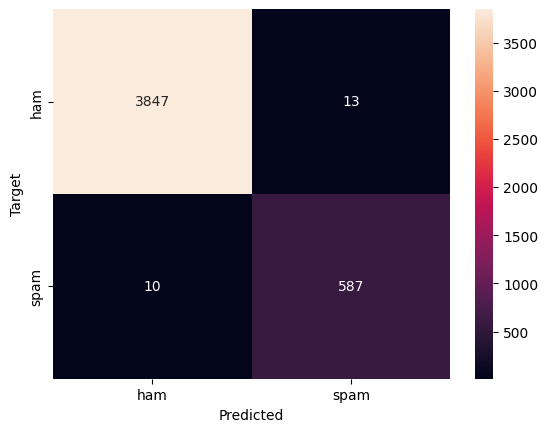

In [16]:
## Plot Train Confusion Matrix
plot_cm(cm_train)

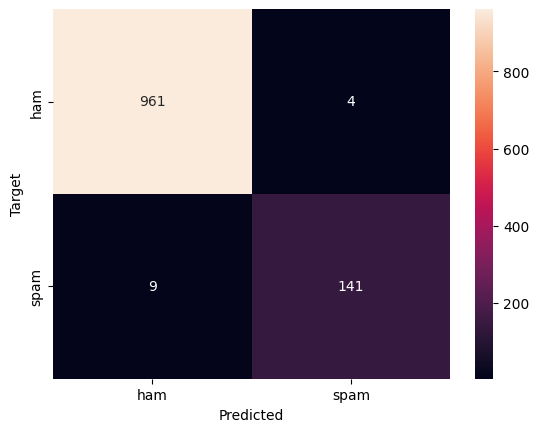

In [17]:
## Plot Test Confusion Matrix
plot_cm(cm_test)